In [35]:
import pandas as pd
import numpy as np

import plotly.express as px

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

In [36]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [98]:
df = pd.read_csv('covid2.csv')
df.head()

,Alter,KursStd,KursBew,SelbstlernStd,FitnessStd,SchlafStd,SozMedStd,FernsehStd,MahlzProTag,GesuProbl,ZeitGenutzt,MehrVerbunden,Geraet_Irgendwelche,Geraet_Laptop/Desktop,Geraet_Smartphone,Geraet_SmartphoneOderLaptop,Geraet_Tablet,SozMed_Elyment,SozMed_Facebook,SozMed_Instagram,SozMed_Linkedin,SocialMedia_None,SozMed_Omegle,SozMed_Quora,SozMed_Reddit,SozMed_Snapchat,SozMed_Talklife,SozMed_Telegram,SozMed_Twitter,SozMed_WhatsApp,SozMed_Whatsapp,SozMed_Youtube,Gewicht_Verloren,Gewicht_Zugenommen,Gewicht_Gleich,StressAbbau_Kreativ,StressAbbau_Digital,StressAbbau_Andere,StressAbbau_PhysAkt,StressAbbau_Entspannung,StressAbbau_SozInt,Vermisse_Bildung/Arbeit,Vermisse_Andere,Vermisse_Outdoor,Vermisse_Sozial,Vermisse_GewohntesLeben
0,21,2.0,4.0,4.0,0.0,7.0,3.0,1.0,4,0,1,1,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False
1,21,0.0,5.0,0.0,2.0,10.0,3.0,0.0,3,0,1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False
2,20,7.0,1.0,3.0,0.0,6.0,2.0,0.0,3,0,0,1,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False
3,20,3.0,1.0,2.0,1.0,6.0,5.0,0.0,3,0,0,0,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False
4,21,3.0,4.0,3.0,1.0,8.0,3.0,1.0,4,0,0,0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Alter                        1145 non-null   int64  
 1   KursStd                      1145 non-null   float64
 2   KursBew                      1145 non-null   float64
 3   SelbstlernStd                1145 non-null   float64
 4   FitnessStd                   1145 non-null   float64
 5   SchlafStd                    1145 non-null   float64
 6   SozMedStd                    1145 non-null   float64
 7   FernsehStd                   1145 non-null   float64
 8   MahlzProTag                  1145 non-null   int64  
 9   GesuProbl                    1145 non-null   int64  
 10  ZeitGenutzt                  1145 non-null   int64  
 11  MehrVerbunden                1145 non-null   int64  
 12  Geraet_Irgendwelche          1145 non-null   bool   
 13  Geraet_Laptop/Desk

In [38]:
df.shape

(1145, 46)

In [39]:
df.describe()

,Alter,KursStd,KursBew,SelbstlernStd,FitnessStd,SchlafStd,SozMedStd,FernsehStd,MahlzProTag,GesuProbl,ZeitGenutzt,MehrVerbunden
count,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000
mean,20.124891,3.274978,2.633188,2.906987,0.761048,7.866201,2.337336,1.025328,2.920524,0.137991,0.488210,0.704803
std,5.567069,2.077161,1.362567,2.125915,0.711130,1.609989,1.734850,1.275108,0.828770,0.345042,0.500079,0.456330
min,7.000000,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,17.000000,2.000000,1.000000,2.000000,0.000000,7.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,20.000000,3.000000,3.000000,2.000000,1.000000,8.000000,2.000000,1.000000,3.000000,0.000000,0.000000,1.000000
75%,21.000000,5.000000,4.000000,4.000000,1.000000,9.000000,3.000000,2.000000,3.000000,0.000000,1.000000,1.000000
max,59.000000,10.000000,5.000000,18.000000,4.000000,15.000000,10.000000,15.000000,8.000000,1.000000,1.000000,1.000000


In [40]:
correlation_matrix = df.corr()
correlation_matrix

,Alter,KursStd,KursBew,SelbstlernStd,FitnessStd,SchlafStd,SozMedStd,FernsehStd,MahlzProTag,GesuProbl,ZeitGenutzt,MehrVerbunden,Geraet_Irgendwelche,Geraet_Laptop/Desktop,Geraet_Smartphone,Geraet_SmartphoneOderLaptop,Geraet_Tablet,SozMed_Elyment,SozMed_Facebook,SozMed_Instagram,SozMed_Linkedin,SocialMedia_None,SozMed_Omegle,SozMed_Quora,SozMed_Reddit,SozMed_Snapchat,SozMed_Talklife,SozMed_Telegram,SozMed_Twitter,SozMed_WhatsApp,SozMed_Whatsapp,SozMed_Youtube,Gewicht_Verloren,Gewicht_Zugenommen,Gewicht_Gleich,StressAbbau_Kreativ,StressAbbau_Digital,StressAbbau_Andere,StressAbbau_PhysAkt,StressAbbau_Entspannung,StressAbbau_SozInt,Vermisse_Bildung/Arbeit,Vermisse_Andere,Vermisse_Outdoor,Vermisse_Sozial,Vermisse_GewohntesLeben
Alter,1.000000,-0.170145,-0.051113,0.012955,-0.053142,-0.119145,0.074959,-0.047030,-0.034033,0.046994,-0.016583,-0.001991,-0.018148,0.203910,-0.159036,-0.075275,-0.106169,0.009963,0.131541,-0.035871,0.091436,-0.032542,0.004650,-0.000664,-0.015768,-0.028262,-0.000664,-0.010361,0.033161,-0.043169,0.057543,-0.117273,-0.042916,0.014221,0.019059,-0.031592,-0.010775,0.046942,-0.065118,-0.017453,0.084279,-0.122607,0.019267,0.215764,-0.066970,-0.048631
KursStd,-0.170145,1.000000,0.154082,0.129942,-0.023592,-0.183146,-0.105696,-0.020340,-0.003847,-0.128912,0.079723,0.004789,0.055023,0.074542,-0.091869,0.029506,0.089978,0.024564,-0.057676,-0.045165,0.020239,0.053044,-0.046635,0.010324,0.023126,0.034341,0.010324,0.009669,-0.060084,0.010324,0.059289,0.015771,0.005192,-0.082101,0.075767,0.002893,-0.034956,-0.010506,-0.002433,0.042182,-0.005656,0.008292,-0.007434,-0.059465,0.029636,0.053596
KursBew,-0.051113,0.154082,1.000000,0.024242,0.095571,-0.009561,-0.132465,0.124037,-0.062220,-0.150683,0.252784,0.181378,0.027562,0.032215,-0.069724,0.056737,0.056469,0.029671,0.049505,-0.135759,-0.025513,-0.035453,-0.035453,0.007963,-0.011339,0.007194,0.007963,0.013804,-0.100173,0.051379,0.097326,0.039949,-0.063765,-0.052719,0.100047,-0.035252,-0.043609,0.010752,0.054474,-0.006563,0.068060,0.185999,-0.022658,-0.079112,-0.112400,-0.008849
SelbstlernStd,0.012955,0.129942,0.024242,1.000000,0.035719,-0.217235,-0.150578,-0.130067,0.057172,0.021088,0.181295,0.011769,0.018482,0.122038,-0.108468,-0.018917,-0.004784,0.098687,-0.052632,-0.096301,0.077582,0.001294,0.029121,-0.012619,0.006015,0.048080,-0.026533,0.002243,0.009352,0.001294,0.037966,0.034041,-0.038505,-0.006102,0.035420,-0.009621,-0.100296,-0.001527,-0.030277,0.105669,0.016108,0.005776,0.008541,0.037758,-0.036056,-0.023162
FitnessStd,-0.053142,-0.023592,0.095571,0.035719,1.000000,-0.039134,-0.083203,0.017732,0.138091,-0.041487,0.183674,0.126695,0.012946,-0.068341,0.052931,-0.031775,0.047534,0.009939,-0.021093,0.049803,-0.070545,-0.031655,0.051533,0.009939,-0.052272,0.028198,-0.031655,-0.023630,-0.012831,0.051533,-0.016929,0.025156,0.112393,-0.081614,-0.006819,-0.025730,-0.084490,0.076498,0.124901,0.005459,-0.007512,-0.019458,-0.010648,0.056739,-0.038650,0.013308
SchlafStd,-0.119145,-0.183146,-0.009561,-0.217235,-0.039134,1.000000,0.075714,0.081851,0.051180,-0.007647,-0.126492,-0.064872,0.005506,-0.050279,0.034332,-0.027416,-0.005369,-0.034286,0.028561,0.051543,-0.037715,0.002458,-0.071029,-0.015914,-0.027416,0.033036,-0.034286,-0.016971,0.068125,0.039202,-0.040752,-0.016622,-0.008503,0.052320,-0.044304,-0.007431,0.062604,-0.058508,-0.033457,-0.005011,-0.030291,0.020915,-0.028748,-0.067513,0.032645,0.044517
SozMedStd,0.074959,-0.105696,-0.132465,-0.150578,-0.083203,0.075714,1.000000,0.142359,0.032981,0.007741,-0.137201,-0.018252,-0.001426,0.083930,-0.063349,-0.028160,-0.025580,-0.022801,0.055534,0.188366,-0.036323,-0.039851,-0.005751,-0.022801,-0.028160,0.068333,0.130646,-0.029675,0.043308,-0.022801,-0.145559,-0.042027,0.029079,0.073194,-0.093365,0.018556,0.189080,-0.030596,-0.031829,-0.161608,-0.000265,-0.031583,-0.053403,0.015490,0.037414,-0.016526
FernsehStd,-0.047030,-0.020340,0.124037,-0.130067,0.017732,0.081851,0.142359,1.000000,-0.011121,-0.034177,-0.004535,0.044709,-0.011708,-0

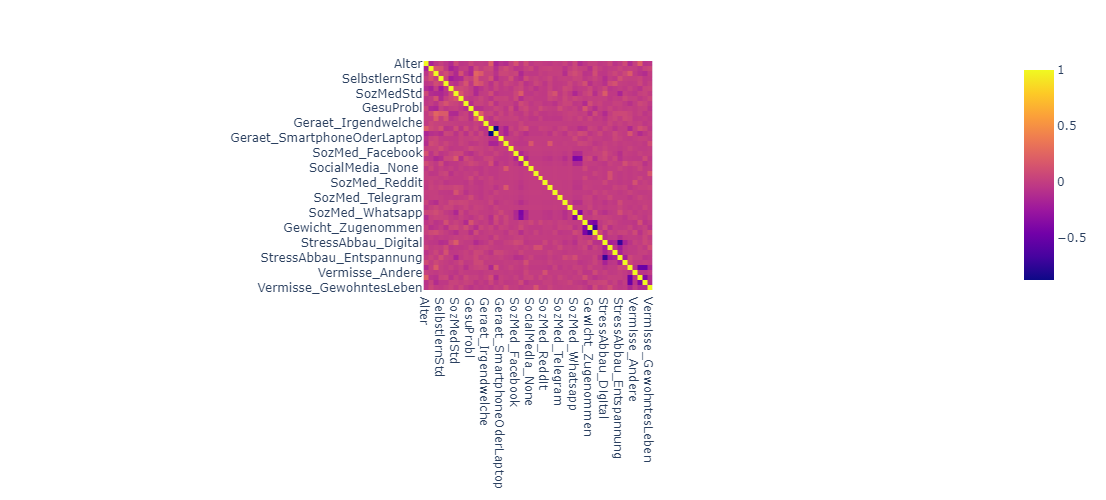

In [41]:
fig = px.imshow(correlation_matrix)
fig.update_layout(height=500)
fig.show()

In [42]:
# Flatten the correlation matrix and convert to a DataFrame
corr_series = correlation_matrix.unstack()

# Remove self-correlations (where two variables are the same)
corr_series = corr_series[corr_series.index.get_level_values(0) != corr_series.index.get_level_values(1)]

# Sort the values by absolute value in descending order
sorted_corr = corr_series.abs().sort_values(ascending=False)

# Filter out correlations where pairs have the same prefix
# Assuming prefix can be determined by splitting on '_'
filtered_corr = sorted_corr[sorted_corr.index.map(lambda x: x[0].split('_')[0] != x[1].split('_')[0])]

# Display the top ten correlations with their pairs and actual values
print(filtered_corr.head(20))

ZeitGenutzt              KursBew                    0.252784
KursBew                  ZeitGenutzt                0.252784
SelbstlernStd            SchlafStd                  0.217235
SchlafStd                SelbstlernStd              0.217235
Vermisse_Outdoor         Alter                      0.215764
Alter                    Vermisse_Outdoor           0.215764
ZeitGenutzt              MehrVerbunden              0.206904
MehrVerbunden            ZeitGenutzt                0.206904
Alter                    Geraet_Laptop/Desktop      0.203910
Geraet_Laptop/Desktop    Alter                      0.203910
StressAbbau_Digital      SozMedStd                  0.189080
SozMedStd                StressAbbau_Digital        0.189080
                         SozMed_Instagram           0.188366
SozMed_Instagram         SozMedStd                  0.188366
KursBew                  Vermisse_Bildung/Arbeit    0.185999
Vermisse_Bildung/Arbeit  KursBew                    0.185999
ZeitGenutzt             

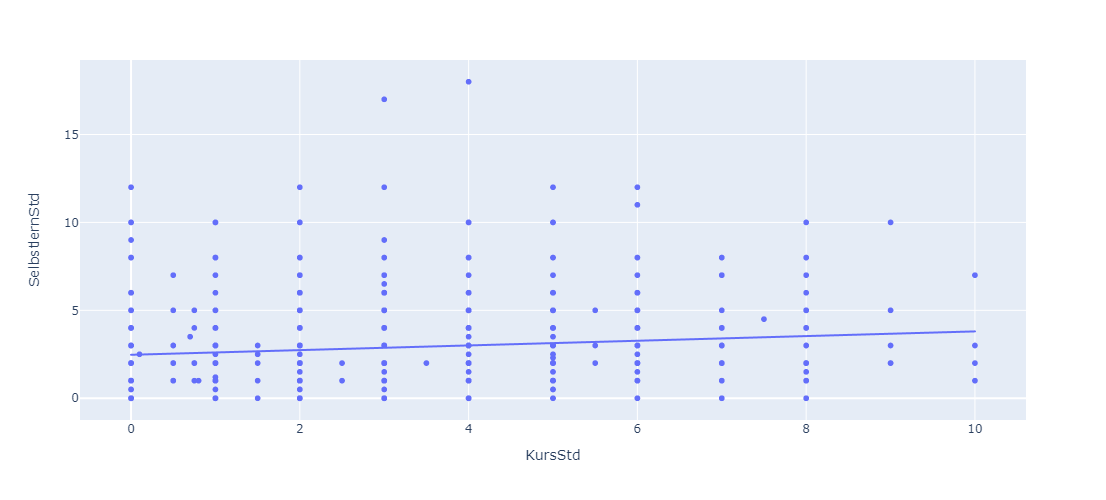

In [44]:
fig = px.scatter(df, x='KursStd', y='SelbstlernStd', height=500, trendline="ols")
fig.show()

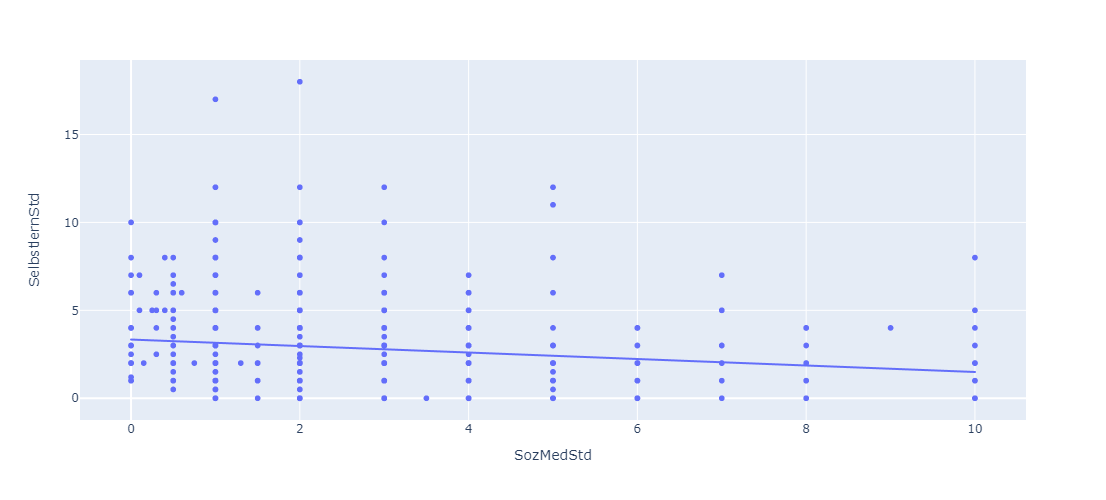

In [45]:
fig = px.scatter(df, x='SozMedStd', y='SelbstlernStd', height=500, trendline="ols")
fig.show()

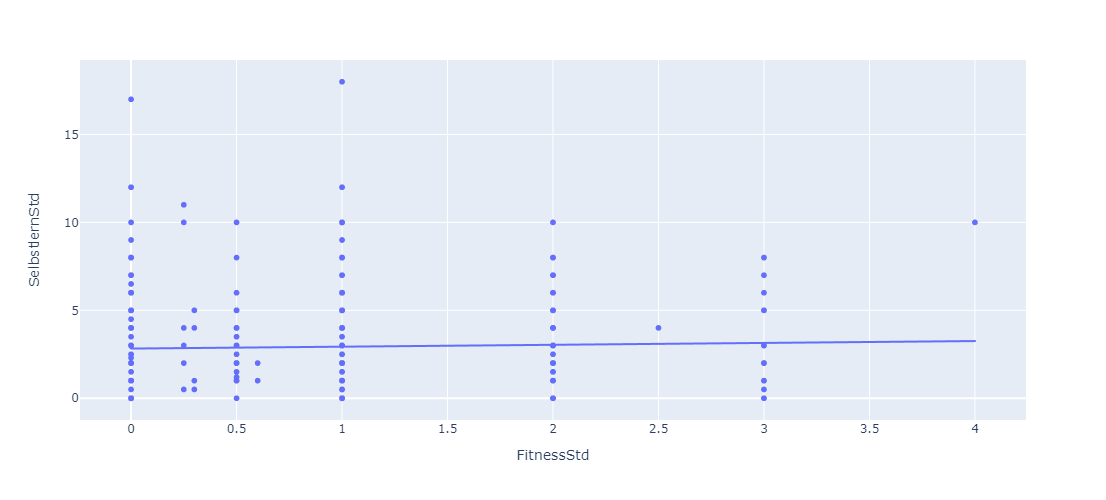

In [46]:
fig = px.scatter(df, x='FitnessStd', y='SelbstlernStd', height=500, trendline="ols")
fig.show()

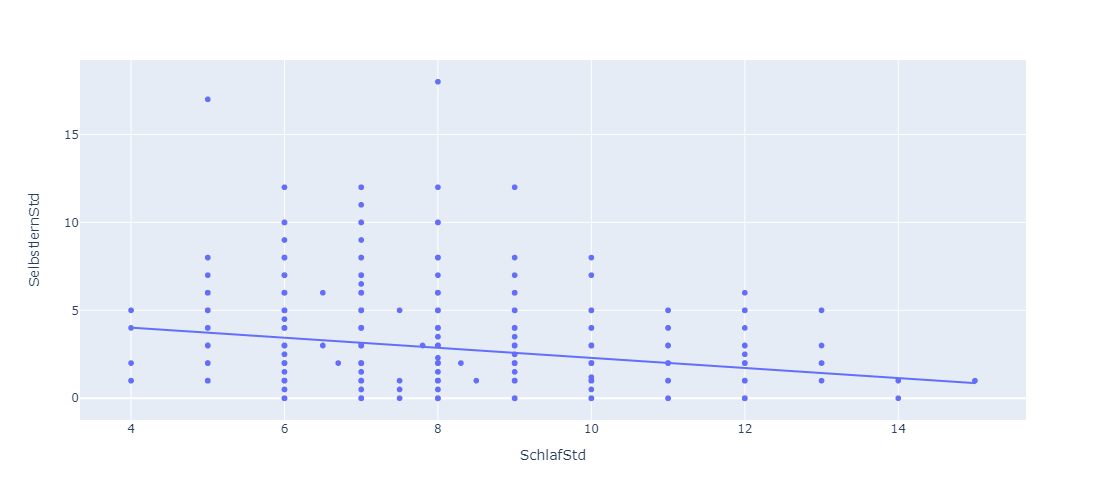

In [47]:
fig = px.scatter(df, x='SchlafStd', y='SelbstlernStd', height=500, trendline="ols")
fig.show()

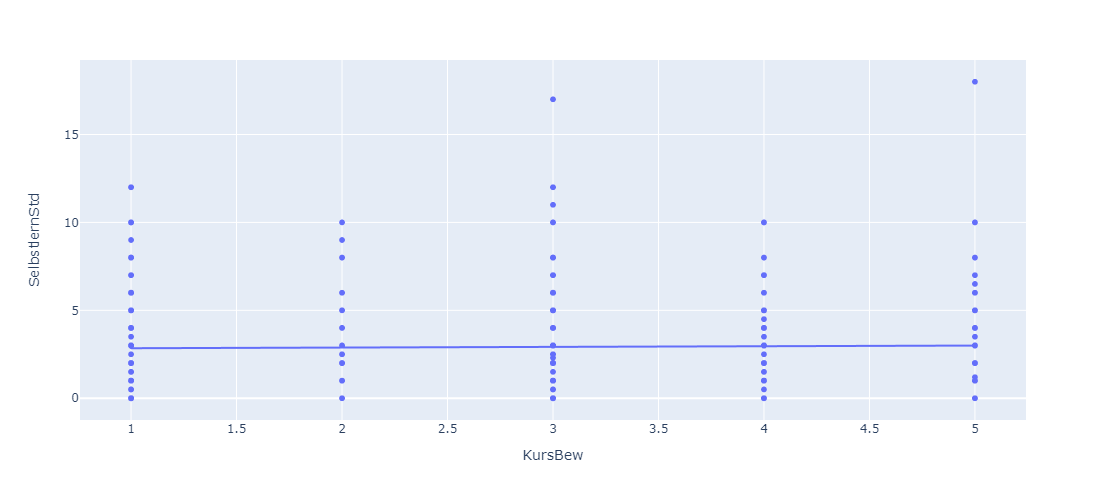

In [48]:
fig = px.scatter(df, x='KursBew', y='SelbstlernStd', height=500, trendline="ols")
fig.show()

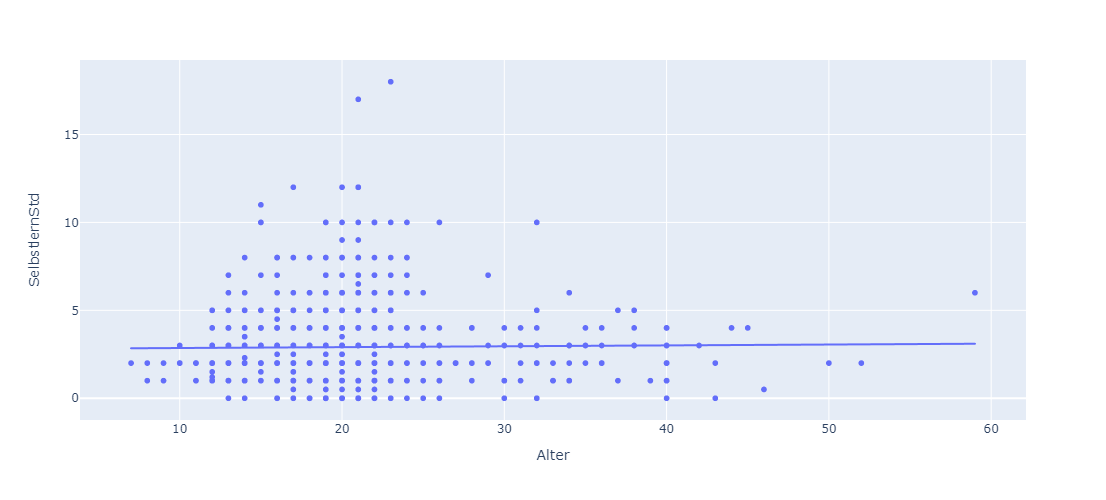

In [49]:
fig = px.scatter(df, x='Alter', y='SelbstlernStd', height=500, trendline="ols")
fig.show()

## Einfache lineare Regression

#### Nicht skaliert

In [52]:
# X Variable festlegen & Konstante einfügen (brauchen wir UNBEDINGT für y-Achsenabschnitt)
X = sm.add_constant(df['KursStd'])  
# Y Variable festlegen
y = df['SelbstlernStd']  
# Modelparameter werden geschätzt (d.h. das Modell wird gefittet)
model_1a = sm.OLS(y, X).fit()
# Ergebnis wird gedruckt
print(model_1a.summary())

                            OLS Regression Results                            
Dep. Variable:          SelbstlernStd   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     19.63
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           1.03e-05
Time:                        22:12:31   Log-Likelihood:                -2478.0
No. Observations:                1145   AIC:                             4960.
Df Residuals:                    1143   BIC:                             4970.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4714      0.116     21.234      0.0

In [53]:
X.head()

,const,KursStd
0,1.0,2.0
1,1.0,0.0
2,1.0,7.0
3,1.0,3.0
4,1.0,3.0


#### Skaliert

In [54]:
# Standardscaler-Objekt wird angelegt
scaler = StandardScaler()
# Standardscaler-Objekt wird auf die Daten angepasst und neue Variable kreiert, die standardisierte Werte enthält
df['KursStd_skaliert'] = scaler.fit_transform(df[['KursStd']])
# X Variable festlegen & Konstante einfügen (brauchen wir UNBEDINGT für y-Achsenabschnitt)
X_scaled = sm.add_constant(df['KursStd_skaliert'])
# Modelparameter werden geschätzt (d.h. das Modell wird gefittet)
model_1b = sm.OLS(y, X_scaled).fit()
# Ergebnis wird gedruckt
print(model_1b.summary())

                            OLS Regression Results                            
Dep. Variable:          SelbstlernStd   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     19.63
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           1.03e-05
Time:                        22:13:12   Log-Likelihood:                -2478.0
No. Observations:                1145   AIC:                             4960.
Df Residuals:                    1143   BIC:                             4970.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.9070      0.062  

In [55]:
X_scaled.head()

,const,KursStd_skaliert
0,1.0,-0.614076
1,1.0,-1.577350
2,1.0,1.794107
3,1.0,-0.132440
4,1.0,-0.132440


## Multiple lineare Regression

#### Nicht skaliert

In [58]:
X = sm.add_constant(df[['KursStd', 'SchlafStd', 'SozMedStd', 'FitnessStd']])
model_2a = sm.OLS(y, X).fit()
print(model_2a.summary())

                            OLS Regression Results                            
Dep. Variable:          SelbstlernStd   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     22.11
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           1.35e-17
Time:                        22:14:21   Log-Likelihood:                -2445.0
No. Observations:                1145   AIC:                             4900.
Df Residuals:                    1140   BIC:                             4925.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9412      0.358     13.813      0.0

#### Skaliert

In [60]:
scaler = StandardScaler()
df['SchlafStd_skaliert'] = scaler.fit_transform(df[['SchlafStd']])
df['SozMedStd_skaliert'] = scaler.fit_transform(df[['SozMedStd']])
df['FitnessStd_skaliert'] = scaler.fit_transform(df[['FitnessStd']])

X_scaled = sm.add_constant(df[['KursStd_skaliert', 'SchlafStd_skaliert', 'SozMedStd_skaliert', 'FitnessStd_skaliert']])
model_2b = sm.OLS(y, X_scaled).fit()
print(model_2b.summary())

                            OLS Regression Results                            
Dep. Variable:          SelbstlernStd   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     22.11
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           1.35e-17
Time:                        22:15:43   Log-Likelihood:                -2445.0
No. Observations:                1145   AIC:                             4900.
Df Residuals:                    1140   BIC:                             4925.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.9070    

## Interaktionsterme

In [93]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from patsy import dmatrices

# Scale the continuous variables
scaler = StandardScaler()
df['SchlafStd'] = scaler.fit_transform(df[['SchlafStd']])
df['SozMedStd'] = scaler.fit_transform(df[['SozMedStd']])

# Define the formula for the model with an interaction and a polynomial term
formula = 'SelbstlernStd ~ SozMedStd * SozMed_Instagram'

# Generate model matrices using patsy
y, X = dmatrices(formula, df, return_type='dataframe')

# Fit the OLS model using statsmodels
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          SelbstlernStd   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     10.82
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           5.15e-07
Time:                        00:08:51   Log-Likelihood:                -2471.7
No. Observations:                1145   AIC:                             4951.
Df Residuals:                    1141   BIC:                             4972.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [100]:
df['SozMed_Instagram'] = df['SozMed_Instagram'].astype(int)

# Scale the continuous variables
scaler = StandardScaler()
df['KursStd_skaliert'] = scaler.fit_transform(df[['KursStd']])
df['SchlafStd_skaliert'] = scaler.fit_transform(df[['SchlafStd']])
df['SozMedStd_skaliert'] = scaler.fit_transform(df[['SozMedStd']])

# Prepare the interaction term
df['SozMedStd_Instagram_interaction'] = df['SozMedStd_skaliert'] * df['SozMed_Instagram']

# Prepare the model matrix
X_scaled = df[['KursStd_skaliert', 'SchlafStd_skaliert', 'SozMedStd_skaliert', 'SozMed_Instagram', 'SozMedStd_Instagram_interaction']]
X_scaled = sm.add_constant(X_scaled)  # adding a constant for the intercept

# Prepare the response variable, assuming it's properly set in your DataFrame
y = df['SelbstlernStd']

# Fit the OLS model
model_2b = sm.OLS(y, X_scaled).fit()

# Print the summary of the model
print(model_2b.summary())


                            OLS Regression Results                            
Dep. Variable:          SelbstlernStd   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     18.58
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           8.97e-18
Time:                        00:14:57   Log-Likelihood:                -2442.9
No. Observations:                1145   AIC:                             4898.
Df Residuals:                    1139   BIC:                             4928.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [102]:
# Define the formula for the model including the interaction term using ':'
formula = """
SelbstlernStd ~ KursStd_skaliert + SchlafStd_skaliert + FitnessStd_skaliert + SozMedStd_skaliert + 
               SozMed_Instagram + SozMedStd_skaliert:SozMed_Instagram
"""

# Fit the OLS model using the formula API
model = smf.ols(formula, data=df).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          SelbstlernStd   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     15.59
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           2.96e-17
Time:                        00:27:45   Log-Likelihood:                -2442.5
No. Observations:                1145   AIC:                             4899.
Df Residuals:                    1138   BIC:                             4934.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

## Logistische Regression

#### Nicht skaliert

In [62]:
# Binäre Variable kreieren

X = sm.add_constant(df[['KursStd', 'SchlafStd', 'SozMedStd', 'FitnessStd']])
y_binary = df['ZeitGenutzt']
model_3a = sm.Logit(y_binary, X).fit()
print(model_3a.summary())

Optimization terminated successfully.
         Current function value: 0.659687
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            ZeitGenutzt   No. Observations:                 1145
Model:                          Logit   Df Residuals:                     1140
Method:                           MLE   Df Model:                            4
Date:                Mon, 08 Jul 2024   Pseudo R-squ.:                 0.04789
Time:                        22:21:19   Log-Likelihood:                -755.34
converged:                       True   LL-Null:                       -793.34
Covariance Type:            nonrobust   LLR p-value:                 1.232e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7831      0.364      2.152      0.031       0.070       1.496
KursStd        0.0548      0.

#### Skaliert

In [63]:
X_scaled = sm.add_constant(df[['KursStd_skaliert', 'SchlafStd_skaliert', 'SozMedStd_skaliert', 'FitnessStd_skaliert']])
model_3b = sm.Logit(y_binary, X_scaled).fit()
print(model_3b.summary())

Optimization terminated successfully.
         Current function value: 0.659687
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            ZeitGenutzt   No. Observations:                 1145
Model:                          Logit   Df Residuals:                     1140
Method:                           MLE   Df Model:                            4
Date:                Mon, 08 Jul 2024   Pseudo R-squ.:                 0.04789
Time:                        22:21:53   Log-Likelihood:                -755.34
converged:                       True   LL-Null:                       -793.34
Covariance Type:            nonrobust   LLR p-value:                 1.232e-15
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0536      0.061     -0.877      0.381      -0.174       0.066
Ku

## Lasso Regression

In [71]:
df = pd.read_csv('covid2.csv')
df['SozMed_WhatsApp'] = df['SozMed_WhatsApp'] | df['SozMed_Whatsapp']
df.drop('SozMed_Whatsapp', axis=1, inplace=True)  # Remove the duplicate column

In [78]:
variables_to_keep = [
    'Alter', 'KursStd', 'KursBew', 'FitnessStd', 'SchlafStd', 'SozMedStd', 
    'FernsehStd', 'ZeitGenutzt', 
    'Geraet_Laptop/Desktop', 'Geraet_Smartphone', 'Geraet_Tablet',
    'SozMed_Facebook', 'SozMed_Instagram', 'SozMed_Linkedin', 
    'SozMed_Twitter', 'SozMed_WhatsApp', 'SozMed_Youtube',
    'StressAbbau_Kreativ', 'StressAbbau_Digital', 'StressAbbau_Andere',
    'StressAbbau_PhysAkt', 'StressAbbau_Entspannung', 'StressAbbau_SozInt'
]

In [82]:
df[variables_to_keep].head()

,Alter,KursStd,KursBew,FitnessStd,SchlafStd,SozMedStd,FernsehStd,ZeitGenutzt,Geraet_Laptop/Desktop,Geraet_Smartphone,Geraet_Tablet,SozMed_Facebook,SozMed_Instagram,SozMed_Linkedin,SozMed_Twitter,SozMed_WhatsApp,SozMed_Youtube,StressAbbau_Kreativ,StressAbbau_Digital,StressAbbau_Andere,StressAbbau_PhysAkt,StressAbbau_Entspannung,StressAbbau_SozInt
0,21,2.0,4.0,0.0,7.0,3.0,1.0,1,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False
1,21,0.0,5.0,2.0,10.0,3.0,0.0,1,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False
2,20,7.0,1.0,0.0,6.0,2.0,0.0,0,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False
3,20,3.0,1.0,1.0,6.0,5.0,0.0,0,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False
4,21,3.0,4.0,1.0,8.0,3.0,1.0,0,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False


In [103]:
# Assuming 'df' is already loaded and cleaned without missing values
y = df['SelbstlernStd']  # response variable
X = df[variables_to_keep]  # predictors

# Scaling the predictors to normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # Assign column names to scaled data
X_scaled = sm.add_constant(X_scaled)  # adding a constant for the intercept


# Fit the Lasso model using statsmodels
model_4a = sm.OLS(y, X_scaled).fit_regularized(method='elastic_net', L1_wt=1, alpha=0.2, refit=True)

# Since fit_regularized does not provide a standard summary, we print coefficients instead
print(model_4a.summary())


                            OLS Regression Results                            
Dep. Variable:          SelbstlernStd   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     20.24
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.00e-25
Time:                        01:26:55   Log-Likelihood:                -2420.6
No. Observations:                1145   AIC:                             4857.
Df Residuals:                    1138   BIC:                             4897.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\Users\hubersi\.conda\envs\stamo24\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning:

invalid value encountered in sqrt



#### Skaliert

In [16]:
df = pd.read_csv('students_data.csv')
df_to_scale = df.drop(columns=['Note', 'Schüler-ID'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_to_scale)
df_scaled = pd.DataFrame(scaled_data, index=df.index, columns=[col + '_scaled' for col in df_to_scale.columns])

In [17]:
df.head()

,Schüler-ID,Alter,Geschlecht,Ethnizität,Bildung_der_Eltern,Lernzeit_pro_Woche,Fehlzeiten,Nachhilfe,Unterstützung_durch_Eltern,Extracurricular,Sports,Musik,Ehrenamt,Notendurchschnitt,Note
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.070804,3.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.957085,2.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.887398,5.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.945782,4.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,3.711939,5.0


In [18]:
df_scaled.head()

,Alter_scaled,Geschlecht_scaled,Ethnizität_scaled,Bildung_der_Eltern_scaled,Lernzeit_pro_Woche_scaled,Fehlzeiten_scaled,Nachhilfe_scaled,Unterstützung_durch_Eltern_scaled,Extracurricular_scaled,Sports_scaled,Musik_scaled,Ehrenamt_scaled,Notendurchschnitt_scaled
0,0.472919,0.978492,-0.853391,0.253711,1.780336,-0.890822,1.522371,-0.108744,-0.788476,-0.660132,2.019544,-0.431866,-1.118086
1,1.362944,-1.021981,-0.853391,-0.746087,0.997376,-1.717694,-0.656870,-0.999551,-0.788476,-0.660132,-0.495161,-0.431866,-1.242374
2,-1.307132,-1.021981,1.091641,1.253509,-0.984045,1.353542,-0.656870,-0.108744,-0.788476,-0.660132,-0.495161,-0.431866,1.960277
3,0.472919,0.978492,-0.853391,1.253509,0.045445,-0.063951,-0.656870,0.782063,1.268269,-0.660132,-0.495161,-0.431866,-0.161790
4,0.472919,0.978492,-0.853391,0.253711,-0.902311,0.290422,1.522371,0.782063,-0.788476,-0.660132,-0.495161,-0.431866,0.675573


In [32]:
X_scaled = sm.add_constant(df_scaled) 
y = df['Note']  
model_4b = sm.OLS(y, X_scaled).fit_regularized(method='elastic_net', L1_wt=1, alpha=0.03, refit=True)
print(model_4b.summary())

                            OLS Regression Results                            
Dep. Variable:                   Note   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     1263.
Date:                Mon, 17 Jun 2024   Prob (F-statistic):               0.00
Time:                        13:05:03   Log-Likelihood:                -2759.9
No. Observations:                2392   AIC:                             5528.
Df Residuals:                    2389   BIC:                             5551.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [20]:
df = pd.read_csv('students_data.csv')
df_to_scale = df.drop(columns=['Note', 'Schüler-ID'])
non_scaled_cols = ['Geschlecht', 'Nachhilfe', 'Extracurricular', 'Sports', 'Musik', 'Ehrenamt']
df_to_scale = df_to_scale.drop(columns=non_scaled_cols)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_to_scale)
df_scaled2 = pd.DataFrame(scaled_data, index=df.index, columns=[col + '_scaled' for col in df_to_scale.columns])
df_final = pd.concat([df[non_scaled_cols], df_scaled2], axis=1)

In [21]:
df_final = sm.add_constant(df_final) 
y = df['Note']  
model_4b = sm.OLS(y, df_final).fit_regularized(method='elastic_net', L1_wt=1, alpha=0.01, refit=True)
print(model_4b.summary())

                            OLS Regression Results                            
Dep. Variable:                   Note   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     758.3
Date:                Mon, 17 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:52:41   Log-Likelihood:                -2758.9
No. Observations:                2392   AIC:                             5530.
Df Residuals:                    2387   BIC:                             5565.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

## Elastic Net

Das Modell `model_4b` verwendet Lasso-Regularisierung über Elastic Net:

- **Elastic Net**: Kombiniert Lasso (L1) und Ridge (L2) Regularisierung, wobei `L1_wt=1` nur Lasso aktiviert.
- **Alpha**: `alpha=0.03` legt die Intensität der Regularisierung fest.
- **Refit**: `refit=True` erlaubt ein Neufitten ohne Regularisierung zur Optimierung der Koeffizienten.


![ElasticNet](elastic_net.jpg "Elastic Net")

## Standardisieren oder nicht???

### Überlegungen zur Datenstandardisierung in der Regression

#### Allgemeine Empfehlung zur Standardisierung

Bei der Anwendung von Regularisierungsverfahren wie **Lasso**, **Ridge** oder **Elastic Net** wird die Standardisierung der Daten empfohlen. Dies stellt sicher, dass:
- Jede Variable denselben Einfluss auf den Regularisierungsterm hat, was zu einer fairen Bestrafung über alle Koeffizienten führt.
- Die numerische Stabilität verbessert und die Konvergenz des Algorithmus beschleunigt wird.
- Eine einfache Interpretation und Vergleichbarkeit der Variablen möglich ist.

Daten können mittels `StandardScaler` aus der `sklearn.preprocessing`-Bibliothek in Python skaliert werden, um einen Mittelwert von 0 und eine Standardabweichung von 1 zu erreichen.

#### Szenarien, in denen eine Standardisierung möglicherweise nicht notwendig ist

Es gibt spezifische Fälle, in denen die Standardisierung der Daten in der Regression möglicherweise vermieden werden sollte:

##### 1. Interpretation der Koeffizienten
- In Modellen, wo die direkte Interpretierbarkeit der Koeffizienten in Bezug auf die Originalmaßeinheiten der Variablen wichtig ist (z. B. Auswirkungen von Werbeausgaben auf den Umsatz).

##### 2. Ähnliche Maßstäbe der Daten
- Wenn alle Variablen bereits in ähnlichen Maßstäben vorliegen, bringt eine zusätzliche Skalierung wenig Nutzen.

##### 3. Modelle mit kategorialen Variablen
- Bei der Einbeziehung von Dummy-Variablen für kategoriale Daten ist eine Skalierung oft nicht sinnvoll, da diese bereits in einem binären Maßstab vorliegen.

##### 4. Zeitreihenanalysen
- In Zeitreihenmodellen kann das Skalieren der Daten die zugrundeliegenden zeitlichen Dynamiken oder Saisonalitäten verzerren.

##### 5. Nichtlineare Modelle
- In Modellen, die nichtlineare Beziehungen modellieren oder spezifische Transformationen verwenden (z. B. logarithmische Transformationen), kann eine Skalierung die Beziehungen zwischen den Variablen künstlich verändern.
 treffen.



#### Gründe gegen die Standardisierung binärer Variablen (bei der Verwendung von Lasso)

- Erhaltung der Interpretierbarkeit: Binäre Variablen repräsentieren typischerweise spezifische Zustände oder Kategorien (z.B. Geschlecht: 0 = männlich, 1 = weiblich). Die Standardisierung dieser Variablen könnte dazu führen, dass die transformierten Werte ihre direkte interpretative Bedeutung verlieren.
- Skalierungseffekt: Die Standardisierung (Subtraktion des Mittelwerts und Division durch die Standardabweichung) würde dazu führen, dass die Werte von binären Variablen nicht mehr auf 0 und 1 beschränkt sind. Dies kann unerwünschte Effekte auf die Modellinterpretation haben, da die resultierenden Werte schwerer zu interpretieren sind als die ursprünglichen binären Indikatoren.
- Regularisierungseffzienz: Lasso und andere Regularisierungstechniken zielen darauf ab, die Koeffizienten weniger informativer oder redundanter Variablen zu reduzieren. Da binäre Variablen bereits eine minimale Skala (0, 1) haben, besteht weniger Risiko, dass ihre Koeffizienten ungerechtfertigt stark bestraft werden, vorausgesetzt sie sind relevant für das Modell.


### Fazit

Die Entscheidung, ob Daten für eine Regression standardisiert werden sollten, hängt stark vom spezifischen Kontext des Modells und den Analysezielen ab. Es ist wichtig, die mathematischen und inhaltlichen Aspekte der verwendeten Daten und Modelle zu berücksichtigen, um die beste methodische Entscheidung zu treffen.
